In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
pd.set_option('display.max_rows', None)

In [22]:
def is_not_in(dfs, keys=range(len(dfs))):

    unis = [dfs[i].iloc[:,0].unique() for i in keys]

    not_in = []
    for i in range(len(keys)):
        for j in range(len(keys)):
        
            if i!=j:
            
                not_in.append([i, j, unis[i][[str(o).lower().strip().replace('á','a')
                                              .replace('é','e')
                                              .replace('í','i')
                                              .replace('ó','o')
                                              .replace('ú','u') not in [str(l).lower().strip().replace('á','a')
                                                                         .replace('é','e')
                                                                         .replace('í','i')
                                                                         .replace('ó','o')
                                                                         .replace('ú','u') for l in unis[j].tolist()] for o in unis[i].tolist()]]])

    return not_in
            

# Loading Infrastructure Tables

In [12]:
energy = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia_complete.csv')

In [3]:
domis2 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\domicilios2_clean.csv')

In [5]:
energy.shape

(1347, 23)

In [6]:
domis2.shape

(229, 34)

In [49]:
dfs = [energy, domis2]

In [50]:
dfs.append(energy.groupby(energy.columns[0], as_index=False, sort=False).mean())

In [51]:
infra = pd.merge(dfs[1], dfs[2], on=dfs[0].columns[0])

In [54]:
infra.shape, dfs[0].shape, dfs[1].shape, dfs[2].shape

((74, 56), (1347, 23), (229, 34), (99, 23))

# Saving/Loading Complete Infrastructre Table

In [61]:
#infra.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\infrastructure_complete.csv', index=False)

In [3]:
infra = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\infrastructure_complete.csv')

# Exploratory Analysis

## Feature Visualization

In [ ]:
target=''

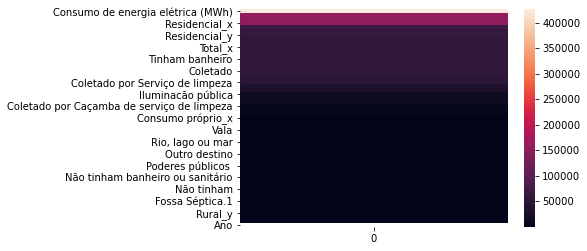

In [10]:
sns.heatmap(data=infra.mean().sort_values(ascending=False).to_frame())


In [537]:
i=-1

4 banheiros ou mais 11


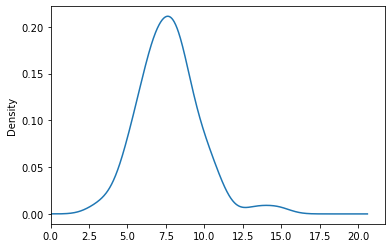

In [738]:
i+=1
print(infra.columns[i], i)

infra[target].apply(np.log1p).plot(kind='kde', xlim=(0))

In [ ]:
infra.corr()[target]

## Importing Machine Learning Modules

In [18]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
from sklearn.metrics import r2_score

# Feature Selection

In [328]:
target = 'Comercial'#'Industrial_x'
y = infra[[target]].apply(np.log1p)

In [420]:
x = infra.iloc[:, 1:].drop([target, 'Ano', 'Consumo de energia elétrica (MWh)', 'Comercial '], axis=1)

In [421]:
for col in x: x[col] = np.log1p(x[col])

In [25]:
skew_cols = infra.iloc[:, 1:].skew()

In [ ]:
skew_cols.sort_values(ascending=False).to_frame().rename(columns={0:'Skew'})#.query('abs(Skew) < 0.75')

# Normalization

In [422]:
x_norm = MinMaxScaler().fit_transform(x)
y_norm = MinMaxScaler().fit_transform(y)

In [210]:
x_norm = StandardScaler().fit_transform(x)
y_norm = StandardScaler().fit_transform(y)

In [216]:
len(x), len(x_norm), len(y_norm)

(74, 74, 74)

# Polynomial Transformation

In [219]:
x_poly_norm = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_norm)

In [211]:
x_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [212]:
x_poly_norm.shape, x_poly.shape, x.shape

((74, 1484), (74, 1484), (74, 53))

# Train Test Split

In [454]:
scrs=[]
for i in range(100): 
    msk = np.random.rand(len(y))<0.8

    #x_train, y_train, x_test, y_test = x_norm[msk], y[msk], x_norm[~msk], y[~msk]
    x_train, y_train, x_test, y_test = x_norm[msk], y_norm[msk], x_norm[~msk], y_norm[~msk]
    xp_train, y_train, xp_test, y_test = x_poly_norm[msk], y_norm[msk], x_poly_norm[~msk], y_norm[~msk]

    # Regression

    ridge = Ridge(alpha=00.1)

    ridge.fit(x_train, y_train)

    y_pred = ridge.predict(x_test)

# Evaluation

    scrs.append(r2_score(y_test, y_pred))

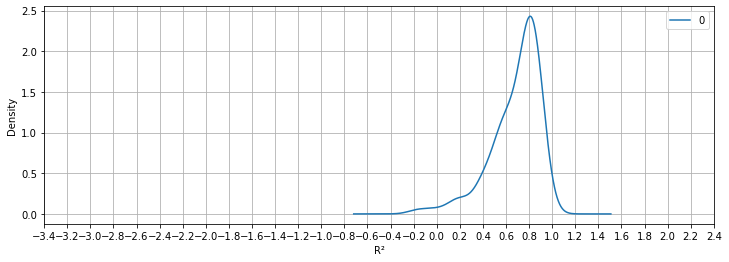

In [455]:
pd.DataFrame(scrs).plot(kind='kde', figsize=(12, 4))
plt.xlabel('R²')
plt.xticks(np.linspace(-3.4, 2.4, 30))
plt.grid()

In [456]:
coefs = ridge.coef_

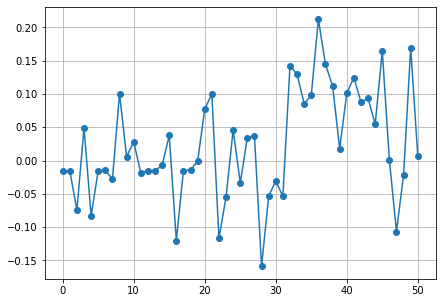

In [457]:
coefs_df = pd.Series(coefs.ravel())
coefs_df.plot(marker='o', figsize=(7,5))
plt.xticks()
plt.grid()

In [413]:
len(coefs_df)

52

In [463]:
high_coefs = []
coefs_values = []

for i in range(len(coefs_df)):
    if np.abs(coefs.ravel()[i])>0.125: 
        high_coefs.append(i)
        coefs_values.append(coefs.ravel()[i])

In [464]:
high_coefs, coefs_values

([28, 32, 33, 36, 37, 45, 49],
 [-0.15915925859955812,
  0.14212082922700636,
  0.12950377322107676,
  0.21220874668796333,
  0.14451859976449052,
  0.16445479956595055,
  0.16922549584464797])

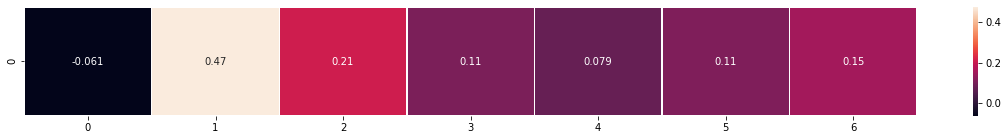

In [491]:
ax = plt.figure(figsize=(20,2))
ax0 = ax.add_subplot(111)
sns.heatmap(pd.DataFrame(coefs_values).T, ax=ax0, annot=True, linewidths=0.5)


In [462]:
x.iloc[:, high_coefs].head()

,Fossa Rudmentar.1,Não tinham banheiro ou sanitário,Residencial_x,Poder público,Iluminacão pública,Industrial_y,Serv.público_y
0,6.035481,7.402452,15.531823,13.987397,12.916191,8.919524,6.648719
1,0.000000,1.945910,8.858854,8.441849,0.000000,3.295837,1.890850
2,0.000000,2.639057,8.479987,8.804201,0.000000,3.749504,1.159237
3,0.000000,3.091042,9.086966,8.985356,0.017419,3.727198,1.571217
4,0.000000,0.000000,8.384285,9.917004,0.000000,2.333357,0.693147


#### Key-Finding: We can tell immediately that neighborhoods without bathrooms will have a lot of sanitaries.

# Lasso

In [475]:
lasso = Lasso(alpha=0.001).fit(x_train, y_train)

In [476]:
y_pred = lasso.predict(x_test)

In [477]:
r2_score(y_test, y_pred)

0.8342366707639266

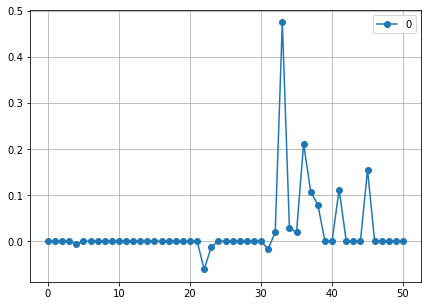

In [478]:
coefs_df = pd.DataFrame(lasso.coef_)
coefs_df.plot(marker='o', figsize=(7,5))
plt.xticks()
plt.grid()

In [479]:
coefs = lasso.coef_

In [480]:
coefs[coefs>0.5]

array([], dtype=float64)

In [484]:
high_coefs = []
coefs_values = []

for i in range(len(coefs_df)):
    if np.abs(coefs.ravel()[i])>0.05:
        
        high_coefs.append(i)
        coefs_values.append(coefs.ravel()[i])

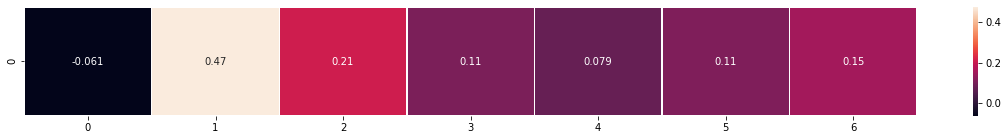

In [490]:
ax = plt.figure(figsize=(20,2))
ax0 = ax.add_subplot(111)
sns.heatmap(pd.DataFrame(coefs_values).T, ax=ax0, annot=True, linewidths=0.5)


In [486]:
x.iloc[:, high_coefs]

,Vala,Residencial_x,Poder público,Iluminacão pública,Serv.público_x,Médio anual por unidade consumidora,Industrial_y
0,10.740800,15.531823,13.987397,12.916191,13.578755,1.229538,8.919524
1,1.098612,8.858854,8.441849,0.000000,9.198336,0.788189,3.295837
2,1.098612,8.479987,8.804201,0.000000,4.448237,0.929753,3.749504
3,1.386294,9.086966,8.985356,0.017419,8.248920,1.154518,3.727198
4,0.000000,8.384285,9.917004,0.000000,0.356675,1.768925,2.333357
...,...,...,...,...,...,...,...
69,3.806662,9.297166,5.755500,0.000000,5.576332,1.133489,2.724580
70,3.091042,9.682779,7.701354,5.278998,7.083311,1.165093,3.483161
71,3.931826,9.897714,6.318116,0.000000,5.942638,1.285954,3.518980
72,0.693147,9.667491,7.199031,4.977762,0.758993,1.200659,4.059365


# Ridge Cross-Validation

In [760]:
alphas = np.linspace(0.001, 2, 1000)

msk = np.random.rand(len(y))<0.8

#x_train, y_train, x_test, y_test = x_norm[msk], y[msk], x_norm[~msk], y[~msk]
x_train, y_train, x_test, y_test = x_norm[msk], y_norm[msk], x_norm[~msk], y_norm[~msk]

ridge_cv = RidgeCV(alphas=alphas)

ridge_cv.fit(x_train, y_train)

y_pred = ridge_cv.predict(x_test)

r2_score(y_test, y_pred)

0.7968516129238314

In [ ]:
ridge_cv?

In [662]:
ridge_cv.alpha_, ridge_cv.best_score_


(0.5951188475390157, 0.5669178363879372)

In [686]:
coefs = ridge_cv.coef_

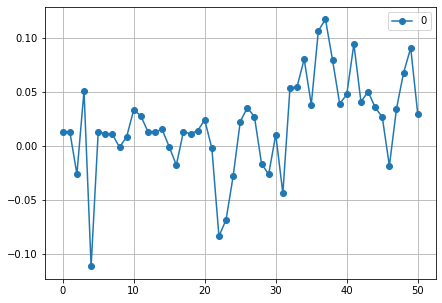

In [689]:
coefs_df = pd.DataFrame(coefs.ravel())
coefs_df.plot(marker='o', figsize=(7,5))
plt.xticks()
plt.grid()

In [691]:
high_coefs = []
coefs_values = []

for i in range(len(coefs_df)):
    if np.abs(coefs.ravel()[i])>0.04:
        
        high_coefs.append(i)
        coefs_values.append(coefs.ravel()[i])

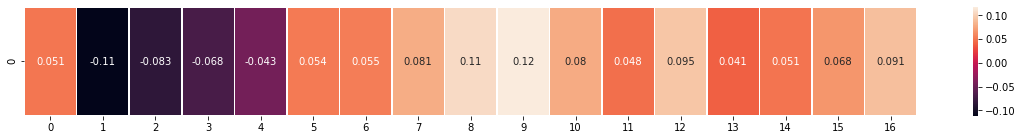

In [692]:
ax = plt.figure(figsize=(20,2))
ax0 = ax.add_subplot(111)
sns.heatmap(pd.DataFrame(coefs_values).T, ax=ax0, annot=True, linewidths=0.5)


In [697]:
x.iloc[:, high_coefs].head(3)

,Coletado por Caçamba de serviço de limpeza,Outro destino,Vala,"Rio, lago ou mar",Outro.1,Não tinham banheiro ou sanitário,Residencial_x,Industrial_x,Poder público,Iluminacão pública,Serv.público_x,Consumo resdencial de energia elétrica (MWh),Médio anual por unidade consumidora,Total de unidades consumidoras residenciais,Total,Iluminação pública,Serv.público_y
0,12.623486,9.683838,10.740800,10.298633,6.453625,7.402452,15.531823,14.752850,13.987397,12.916191,13.578755,15.532349,1.229538,14.649661,14.738778,4.33472,6.648719
1,7.766841,1.098612,1.098612,0.693147,0.000000,1.945910,8.858854,9.618550,8.441849,0.000000,9.198336,8.861758,0.788189,8.676012,8.735244,0.00000,1.890850
2,7.099202,4.317488,1.098612,0.000000,2.079442,2.639057,8.479987,7.607322,8.804201,0.000000,4.448237,8.481118,0.929753,8.057397,8.230644,0.00000,1.159237


# Lasso Cross-Validation

In [891]:
alphas = np.linspace(0.001, 5, 5000)

msk = np.random.rand(len(y))<0.8

#x_train, y_train, x_test, y_test = x_norm[msk], y[msk], x_norm[~msk], y[~msk]
x_train, y_train, x_test, y_test = x_norm[msk], y_norm[msk], x_norm[~msk], y_norm[~msk]

lasso_cv = LassoCV(max_iter=5e4)

lasso_cv.fit(x_train, y_train)

y_pred = lasso_cv.predict(x_test)

r2_score(y_test, y_pred)

C:\Users\luisr\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8840987182479203

In [709]:
lasso_cv.alpha_, lasso_cv.n_iter_, lasso_cv.dual_gap_


(0.0007272647587519476, 96, 5.0317729219456764e-05)

In [712]:
len(lasso_cv.mse_path_[0])

5

In [713]:
coefs = lasso_cv.coef_

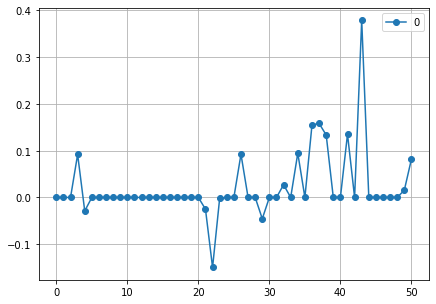

In [714]:
coefs_df = pd.DataFrame(coefs.ravel())
coefs_df.plot(marker='o', figsize=(7,5))
plt.xticks()
plt.grid()

In [719]:
high_coefs = []
coefs_values = []

for i in range(len(coefs_df)):
    if np.abs(coefs.ravel()[i])>0.05:
        
        high_coefs.append(i)
        coefs_values.append(coefs.ravel()[i])
print(coefs_values)

[0.09193345868908223, -0.14963434166268458, 0.09236029933384064, 0.0945635089379132, 0.1549992069010674, 0.1582115964936699, 0.13342891990357983, 0.13510971115967332, 0.3784859446780639, 0.08169507952691188]


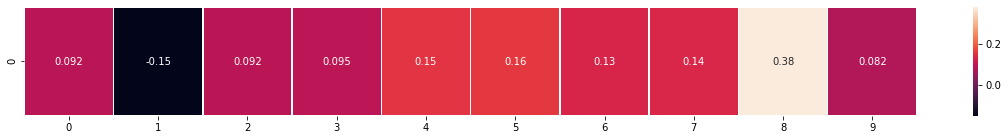

In [720]:
ax = plt.figure(figsize=(20,2))
ax0 = ax.add_subplot(111)
sns.heatmap(pd.DataFrame(coefs_values).T, ax=ax0, annot=True, linewidths=0.5)


In [721]:
x.iloc[:, high_coefs].head()

,Coletado por Caçamba de serviço de limpeza,Vala,Rede Geral de Esgoto ou pluvial.1,Industrial_x,Poder público,Iluminacão pública,Serv.público_x,Médio anual por unidade consumidora,Total,Consumo próprio_y
0,12.623486,10.740800,9.952944,14.752850,13.987397,12.916191,13.578755,1.229538,14.738778,5.305258
1,7.766841,1.098612,5.093750,9.618550,8.441849,0.000000,9.198336,0.788189,8.735244,0.782759
2,7.099202,1.098612,5.768321,7.607322,8.804201,0.000000,4.448237,0.929753,8.230644,0.117783
3,6.484635,1.386294,5.407172,8.044667,8.985356,0.017419,8.248920,1.154518,8.442887,0.594707
4,2.833213,0.000000,4.543295,9.678853,9.917004,0.000000,0.356675,1.768925,7.364626,0.318454


In [702]:
x.columns

Index(['Total_x', 'Coletado', 'Coletado por Serviço de limpeza',
       'Coletado por Caçamba de serviço de limpeza', 'Outro destino',
       'Total_y', 'Tinham banheiro', '1 banheiro', '2 banheiros',
       '3 banheiros', '4 banheiros ou mais', 'Não tinham banheiro',
       'Total_x.1', 'Tinham energia eletrica', 'Companhia distribuidora',
       'Outra fonte', 'Não tinham', 'Total_y.1', 'Tinham banheiro exclusivo',
       'Rede Geral de Esgoto ou pluvial', 'Fossa Séptica', 'Fossa Rudmentar',
       'Vala', 'Rio, lago ou mar', 'Outro',
       'Sanitário cujo esgotamento é feito por:',
       'Rede Geral de Esgoto ou pluvial.1', 'Fossa Séptica.1',
       'Fossa Rudmentar.1', 'Vala.1', 'Rio, lago ou mar.1', 'Outro.1',
       'Não tinham banheiro ou sanitário', 'Residencial_x', 'Industrial_x',
       'Rural_x', 'Poder público ', 'Iluminacão pública', 'Serv.público_x',
       'Consumo próprio_x', 'Consumo resdencial de energia elétrica (MWh)',
       'Médio anual por unidade consumidora  

In [ ]:
lasso_cv?

# Elastic Net CV

In [722]:
from sklearn.linear_model import ElasticNetCV

In [735]:
elasticNetCV = ElasticNetCV(max_iter=1e4,
                            l1_ratio=[.1, .5, .7, .9, .95, .99, 1]).fit(x_train, y_train)

C:\Users\luisr\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [736]:
y_pred = elasticNetCV.predict(x_test)

In [737]:
r2_score(y_test, y_pred)

0.881360752755708

In [749]:
elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV.n_iter_

(0.005130709100547478, 0.1, 160)

In [739]:
coefs = elasticNetCV.coef_

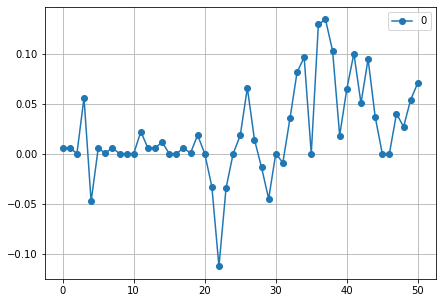

In [740]:
coefs_df = pd.DataFrame(coefs.ravel())
coefs_df.plot(marker='o', figsize=(7,5))
plt.xticks()
plt.grid()

In [741]:
high_coefs = []
coefs_values = []

for i in range(len(coefs_df)):
    if np.abs(coefs.ravel()[i])>0.05:
        
        high_coefs.append(i)
        coefs_values.append(coefs.ravel()[i])
print(coefs_values)

[0.05585535649756946, -0.1128111455401474, 0.06576392656102553, 0.08140911805456236, 0.09634673280713847, 0.12922817642376533, 0.13431717955022326, 0.10287200886932238, 0.06450037730507292, 0.1001211876906914, 0.05039674044133873, 0.09466342747417449, 0.05404149783475563, 0.07066858330754498]


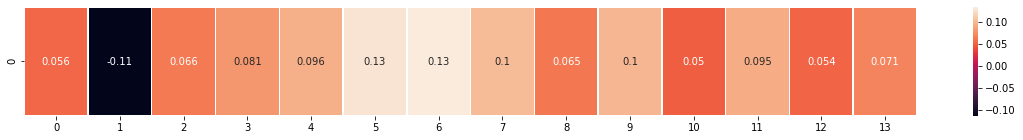

In [742]:
ax = plt.figure(figsize=(20,2))
ax0 = ax.add_subplot(111)
sns.heatmap(pd.DataFrame(coefs_values).T, ax=ax0, annot=True, linewidths=0.5)


In [743]:
x.iloc[:, high_coefs].head()

,Coletado por Caçamba de serviço de limpeza,Vala,Rede Geral de Esgoto ou pluvial.1,Residencial_x,Industrial_x,Poder público,Iluminacão pública,Serv.público_x,Consumo resdencial de energia elétrica (MWh),Médio anual por unidade consumidora,Total de unidades consumidoras residenciais,Total,Serv.público_y,Consumo próprio_y
0,12.623486,10.740800,9.952944,15.531823,14.752850,13.987397,12.916191,13.578755,15.532349,1.229538,14.649661,14.738778,6.648719,5.305258
1,7.766841,1.098612,5.093750,8.858854,9.618550,8.441849,0.000000,9.198336,8.861758,0.788189,8.676012,8.735244,1.890850,0.782759
2,7.099202,1.098612,5.768321,8.479987,7.607322,8.804201,0.000000,4.448237,8.481118,0.929753,8.057397,8.230644,1.159237,0.117783
3,6.484635,1.386294,5.407172,9.086966,8.044667,8.985356,0.017419,8.248920,9.085998,1.154518,8.294065,8.442887,1.571217,0.594707
4,2.833213,0.000000,4.543295,8.384285,9.678853,9.917004,0.000000,0.356675,8.385056,1.768925,6.784316,7.364626,0.693147,0.318454


# Sthocastic Gradient Descent

In [746]:
from sklearn.linear_model import SGDRegressor

In [914]:
model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lasso_cv.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridge_cv.alpha_},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

scrs = []

for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=0.02, **parameters)
    SGD.fit(x_train, y_train)
    scrs.append([modellabel, r2_score(y_test, SGD.predict(x_test))])


C:\Users\luisr\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\luisr\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\luisr\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\luisr\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

##  SGD Evaluation

In [915]:
scrs

[['Linear', 0.7728334625812923],
 ['Lasso', 0.7683853437253797],
 ['Ridge', -0.023112313606260315],
 ['ElasticNet', 0.7748107643111565]]

In [916]:
model_parameters_dict

{'Linear': {'penalty': 'none'},
 'Lasso': {'penalty': 'l2', 'alpha': 0.0009949200925338498},
 'Ridge': {'penalty': 'l1', 'alpha': 1.1515755755755754},
 'ElasticNet': {'penalty': 'elasticnet',
  'alpha': 0.005130709100547478,
  'l1_ratio': 0.1}}

In [917]:
SGD.n_iter_, SGD.t_

(7, 414.0)

In [918]:
coefs = SGD.coef_

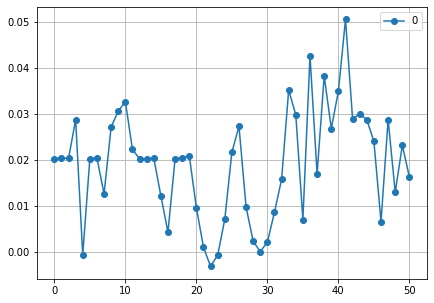

In [919]:
coefs_df = pd.DataFrame(coefs.ravel())
coefs_df.plot(marker='o', figsize=(7,5))
plt.xticks()
plt.grid()

In [898]:
high_coefs = []
coefs_values = []

for i in range(len(coefs_df)):
    if np.abs(coefs.ravel()[i])>0.03:
        
        high_coefs.append(i)
        coefs_values.append(coefs.ravel()[i])
print(coefs_values)

[0.0378400446495886, 0.04132080192767116, 0.03631273546010621, -0.03285308770140425, -0.05166288069228877, 0.03594992758722418, 0.043645057497795715, 0.04152906429786302, 0.03412537393272033, 0.09308293357685461, 0.06703922863633774, 0.06279967602850134, 0.030982278982897092, 0.041562720972079206, 0.0793419896433997, 0.03672518233494052, 0.03804212958870115, 0.06916956207339779, 0.035320218777052846, 0.046330290820487556]


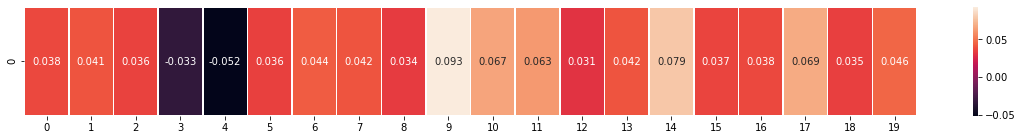

In [899]:
ax = plt.figure(figsize=(20,2))
ax0 = ax.add_subplot(111)
sns.heatmap(pd.DataFrame(coefs_values).T, ax=ax0, annot=True, linewidths=0.5)


In [900]:
x.iloc[:, high_coefs].head()

,3 banheiros,4 banheiros ou mais,Não tinham banheiro,Vala,"Rio, lago ou mar",Sanitário cujo esgotamento é feito por:,Rede Geral de Esgoto ou pluvial.1,Residencial_x,Industrial_x,Poder público,Iluminacão pública,Serv.público_x,Consumo próprio_x,Consumo resdencial de energia elétrica (MWh),Médio anual por unidade consumidora,Total,Industrial_y,Poderes públicos,Iluminação pública,Serv.público_y
0,12.207242,11.008314,10.212405,10.740800,10.298633,10.150348,9.952944,15.531823,14.752850,13.987397,12.916191,13.578755,11.200172,15.532349,1.229538,14.738778,8.919524,8.624754,4.334720,6.648719
1,4.454347,3.258097,5.153292,1.098612,0.693147,5.117994,5.093750,8.858854,9.618550,8.441849,0.000000,9.198336,2.523807,8.861758,0.788189,8.735244,3.295837,3.835412,0.000000,1.890850
2,4.007333,3.091042,5.828946,1.098612,0.000000,5.789960,5.768321,8.479987,7.607322,8.804201,0.000000,4.448237,0.000000,8.481118,0.929753,8.230644,3.749504,3.135494,0.000000,1.159237
3,4.382027,3.295837,5.690359,1.386294,0.000000,5.616771,5.407172,9.086966,8.044667,8.985356,0.017419,8.248920,1.014778,9.085998,1.154518,8.442887,3.727198,3.789855,0.318454,1.571217
4,3.091042,2.079442,4.543295,0.000000,0.000000,4.543295,4.543295,8.384285,9.678853,9.917004,0.000000,0.356675,5.648471,8.385056,1.768925,7.364626,2.333357,3.279500,0.000000,0.693147


### Conclusion: Comercial Energy Consumption rate in each neighborhood is mostly correlated to the presence of public units and the total energy consumption rate of public units in that neighborhood. In other words we will find more comercial consumption of energy in neighborhoods with more public units and more public energy consumption.

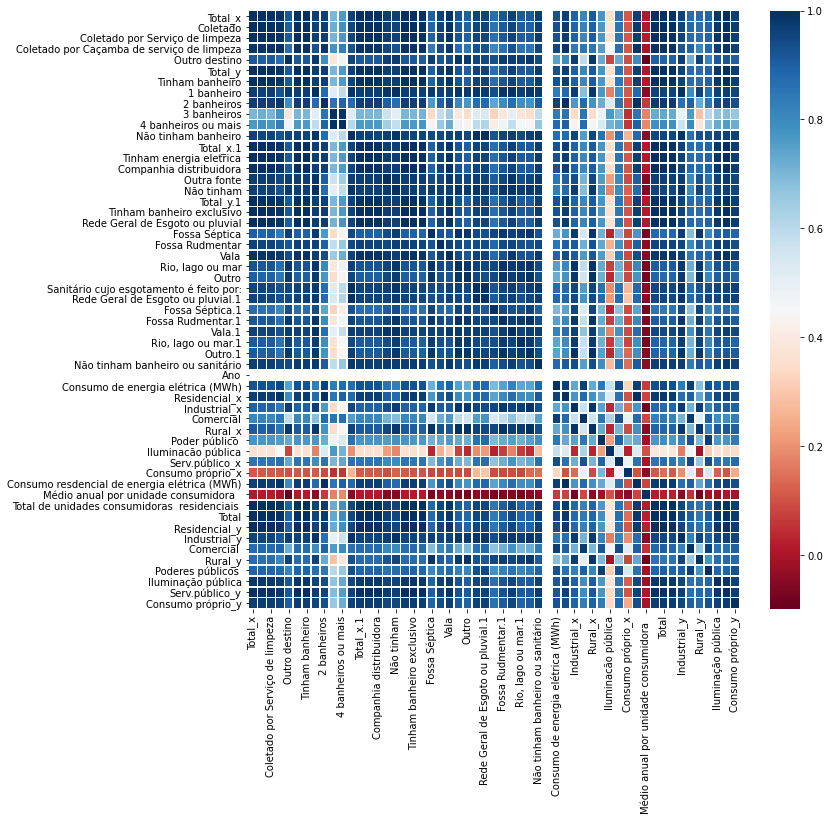

In [60]:
fig = plt.figure(figsize=(1,11))
ax0 = fig.add_subplot(111)
sns.heatmap(infra.iloc[1:].corr(), cmap='RdBu', linewidths=0.5, ax=ax0) 

In [ ]:
from